# **Análise Exploratória de Dados com Tidyverse**

## **Carregar bibliotecas e dados**

A biblioteca Tidyverse é uma ferramenta útil que fornece várias ferramentas para visualização de dados, manipulação de dados e leitura de vários conjuntos de dados em um quadro de dados.

In [1]:
# Carregando o tidyverse
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# url onde os dados estão localizados
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# baixando o arquivo
download.file(url, destfile = "lax_to_jfk.tar.gz")

# descompactando o arquivo para obter apenas o csv
# se você executar isso em sua máquina local, poderá remover tar = "internal"
untar("lax_to_jfk.tar.gz", tar = "internal")

# somente read_csv
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                     col_types = cols('DivDistance' = col_number(),
                                      'DivArrDelay' = col_number()))

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”


**Observação:** *O projeto GitHub tem uma pasta chamada Files, nela contem esses dados já baixado*

## **Analisando padrões de recursos individuais usando visualização**

*Boxplots* são uma ótima maneira de visualizar dados numéricos (ou quantitativos), uma vez que você pode visualizar as várias distribuições dos dados. Eles são semelhantes aos histogramas, mas podem mostrar mais informações.

Abaixo mostra a distribuição dos atrasos de chegada para cada companhia aérea informante.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


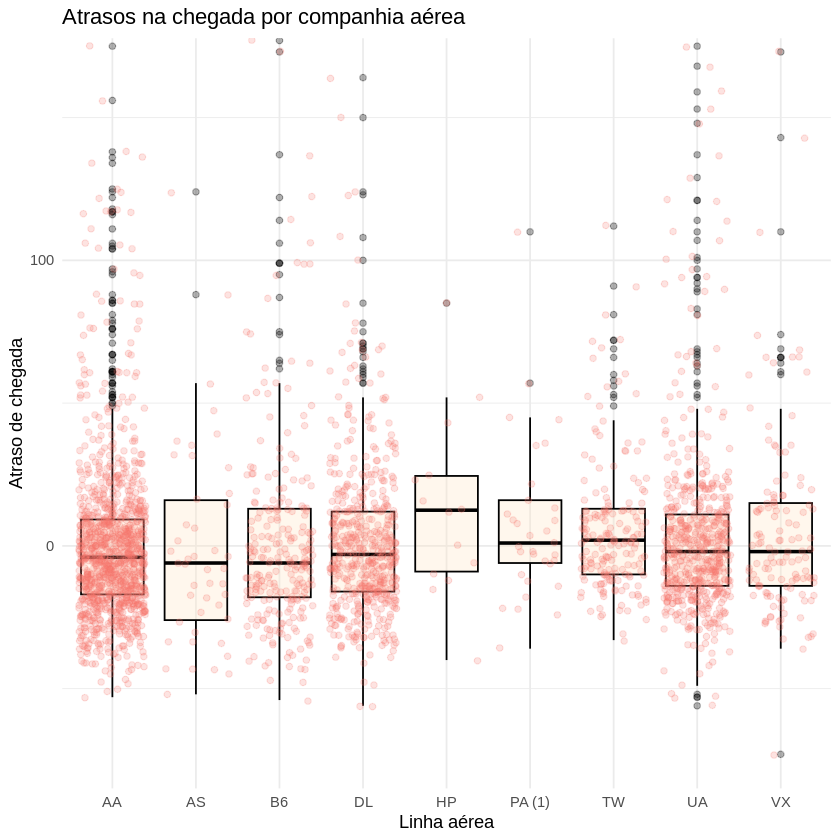

In [10]:
# Boxplot
ggplot(data = sub_airline, mapping = aes(x = Reporting_Airline, y = ArrDelay)) +
  geom_boxplot(fill = "bisque", color = "black", alpha = 0.3) +
  geom_jitter(aes(color = "blue"), alpha = 0.2) +
  labs(x = "Linha aérea", y = "Atraso de chegada") +
  ggtitle("Atrasos na chegada por companhia aérea") +
  guides(color = FALSE) +
  theme_minimal() +
  coord_cartesian(ylim = quantile(sub_airline$ArrDelay, c(0, 0.99)))

E se quisermos entender a relação entre "DepDelay" e "ArrDelay"? O atraso na partida poderia prever o atraso na chegada? Uma boa maneira de visualizar duas variáveis contínuas é usar um gráfico de dispersão. Cada observação em um gráfico de dispersão é representada como um ponto.

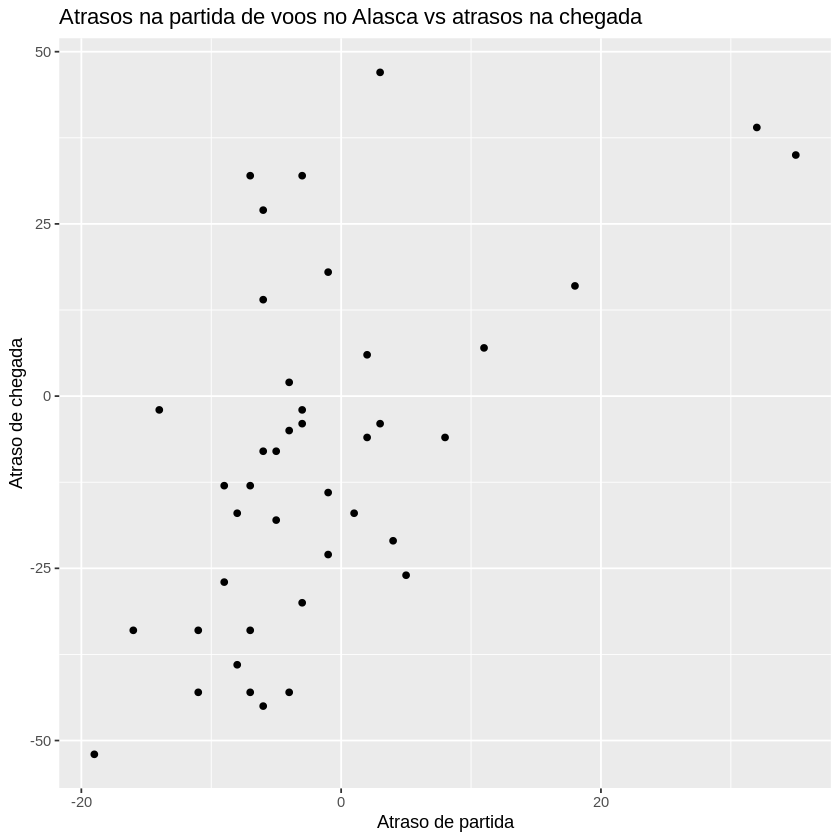

In [11]:
# Carregando dados do Alasca, excluindo linhas que não possuem dados de atraso de partida ou atraso de chegada
alaska_flights <- sub_airline %>%
  filter(Reporting_Airline == "AS") %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay)) %>%
  filter(DepDelay < 40)

ggplot(data = alaska_flights, mapping = aes(x = DepDelay, y = ArrDelay)) +
  geom_point() +
  ggtitle("Atrasos na partida de voos no Alasca vs atrasos na chegada") +
  labs(x = "Atraso de partida", y = "Atraso de chegada")

## **Como escolher o método de visualização certo?**

Ao visualizar variáveis individuais, é importante primeiro entender com que tipo de variável você está lidando. Isso nos ajudará a encontrar o método de visualização certo para essa variável. Abaixo está uma maneira de mostrar cada variável e seu tipo em um dataframe.

In [12]:
# lista os tipos de dados para cada coluna
str(sub_airline)

spc_tbl_ [2,855 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Month            : num [1:2855] 3 11 8 4 11 4 12 12 2 3 ...
 $ DayOfWeek        : num [1:2855] 5 4 5 7 3 1 1 3 4 4 ...
 $ FlightDate       : Date[1:2855], format: "2003-03-28" "2018-11-29" ...
 $ Reporting_Airline: chr [1:2855] "UA" "AS" "UA" "DL" ...
 $ Origin           : chr [1:2855] "LAX" "LAX" "LAX" "LAX" ...
 $ Dest             : chr [1:2855] "JFK" "JFK" "JFK" "JFK" ...
 $ CRSDepTime       : chr [1:2855] "2210" "1045" "0805" "2205" ...
 $ CRSArrTime       : chr [1:2855] "0615" "1912" "1634" "0619" ...
 $ DepTime          : chr [1:2855] "2209" "1049" "0757" "2212" ...
 $ ArrTime          : chr [1:2855] "0617" "1851" "1620" "0616" ...
 $ ArrDelay         : num [1:2855] 2 -21 -14 -3 -13 -20 1 -40 25 7 ...
 $ ArrDelayMinutes  : num [1:2855] 2 0 0 0 0 0 1 0 25 7 ...
 $ CarrierDelay     : num [1:2855] NA NA NA NA NA NA NA NA NA NA ...
 $ WeatherDelay     : num [1:2855] NA NA NA NA NA NA NA NA NA NA ...
 $ NASDelay         

Agora, focando em "ArrDelayMinutes".

> Qual é o tipo de dados da coluna "ArrDelayMinutes"?

In [13]:
class(sub_airline$ArrDelayMinutes)

[1] "numeric"

Em seguida, vamos dar uma olhada em outras variáveis, como "DepDelayMinutes" que poderiam ajudar a prever "ArrDelayMinutes".

> Encontre a correlação entre as seguintes colunas: **DepDelayMinutes** e **ArrDelayMinutes**.

In [14]:
cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes)

[1] 0.9213328

## **Variáveis numéricas contínuas**

Variáveis numéricas contínuas são variáveis que podem conter qualquer valor dentro de algum intervalo. Em R, variáveis numéricas contínuas podem ter o tipo "inteiro" ou "numérico" (estes são números reais e às vezes são chamados de "float" em outras linguagens de programação). Uma ótima maneira de visualizar essas variáveis é usando gráficos de dispersão com linhas ajustadas.

### **Relação linear positiva**

Encontrando o gráfico de dispersão de "DepDelayMinutes" e "ArrDelayMinutes" de todas as companhias aéreas.


`geom_smooth()` using formula = 'y ~ x'


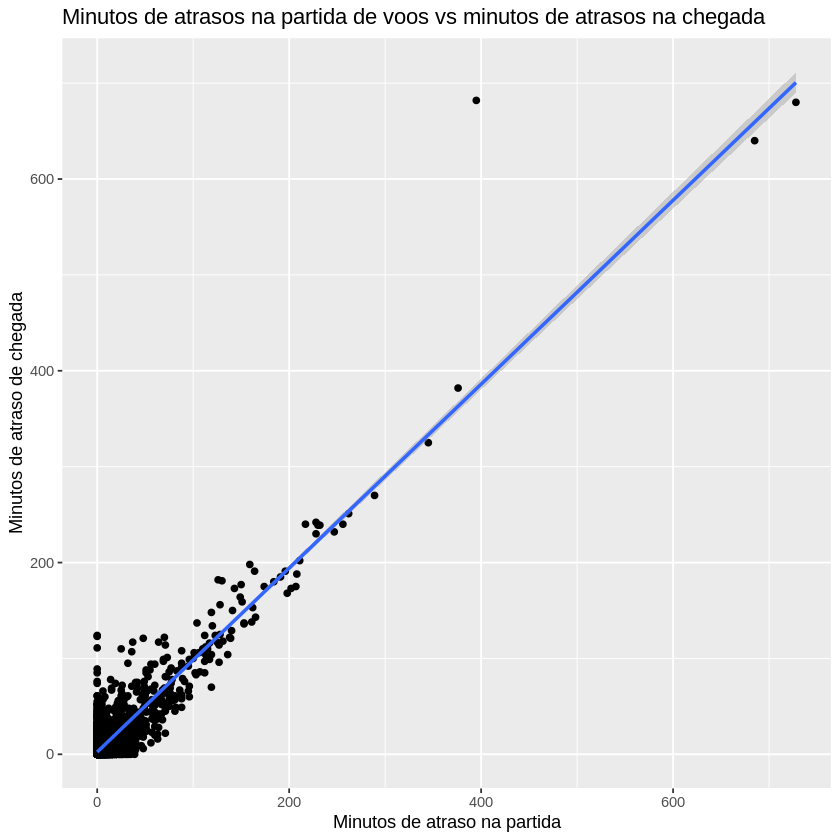

In [15]:
# DepDelayMinutes como potencial variável preditora de ArrDelayMinutes

ggplot(data = sub_airline, mapping = aes(x = DepDelayMinutes, y = ArrDelayMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", na.rm = TRUE) +
  ggtitle("Minutos de atrasos na partida de voos vs minutos de atrasos na chegada") +
  labs(x = "Minutos de atraso na partida", y = "Minutos de atraso de chegada")

*A partir do gráfico, à medida que o atraso de depatura ("DepDelayMinutes") aumenta, o atraso de chegada ("ArrDelayMinutes") aumenta. Isso indica uma correlação direta positiva entre essas duas variáveis.*

Em seguida, podemos examinar a correlação entre "DepDelayMinutes" e "ArrDelayMinutes" e ver que é aproximadamente 0,92

In [16]:
cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes)

[1] 0.9213328

### **Relação linear fraca**

Vamos agora ver se "WeatherDelay" (Atraso climático) é uma boa variável preditora de "ArrDelayMinutes" (Minutos de atraso de chegada).

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2486 rows containing missing values (`geom_point()`).”


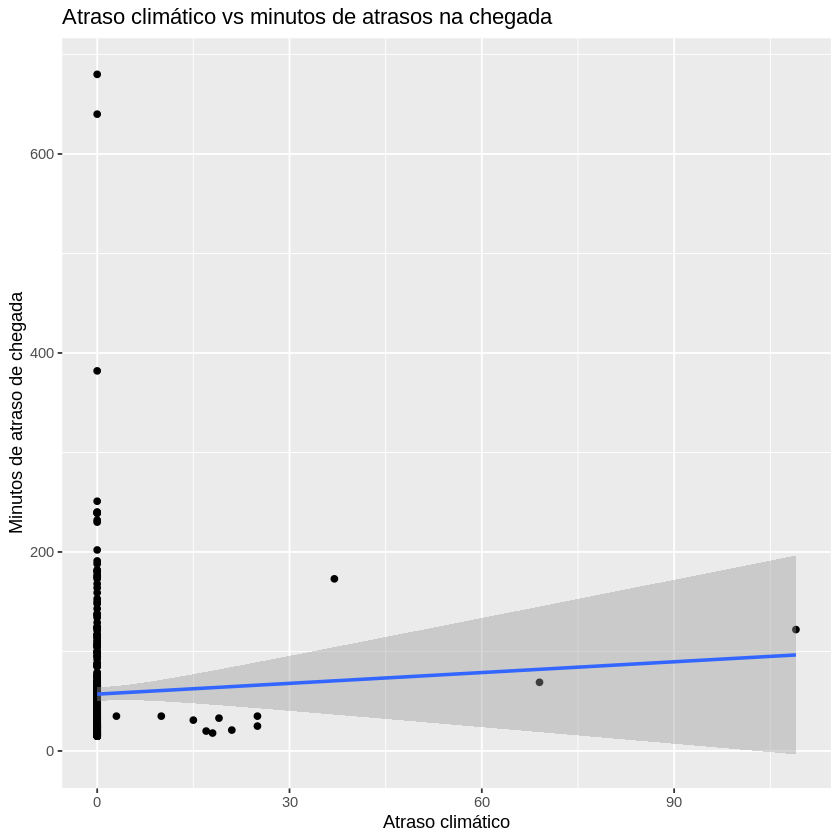

In [17]:
ggplot(data = sub_airline, mapping = aes(x = WeatherDelay, y = ArrDelayMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", na.rm = TRUE) +
  ggtitle("Atraso climático vs minutos de atrasos na chegada") +
  labs(x = "Atraso climático", y = "Minutos de atraso de chegada")

*O atraso climático não parece ser um bom preditor de minutos de atraso de chegada, uma vez que a linha de regressão está próxima da horizontal. Além disso, para pequenos valores de "WeatherDelay", os pontos de dados estão muito dispersos e longe da linha ajustada, mostrando muita variabilidade. Portanto, não é uma variável confiável.*

Na função cor(), você pode adicionar **use = "complete.obs"** para usar apenas observações completas, ou seja, excluir NAs. Você pode examinar a correlação entre "WeatherDelay" e "ArrDelayMinutes" e ver que é uma relação muito fraca, já que o valor está próximo de 0.

In [18]:
cor(sub_airline$WeatherDelay, sub_airline$ArrDelayMinutes, use = "complete.obs")

[1] 0.04019104

> Encontre a correlação entre x="CarrierDelay", y="ArrDelayMinutes".
>
> Dados os resultados de correlação entre x="CarrierDelay", y="ArrDelayMinutes", você espera uma relação linear?

In [19]:
cor(sub_airline$CarrierDelay, sub_airline$ArrDelayMinutes, use = "complete.obs")

[1] 0.7287601

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2486 rows containing missing values (`geom_point()`).”


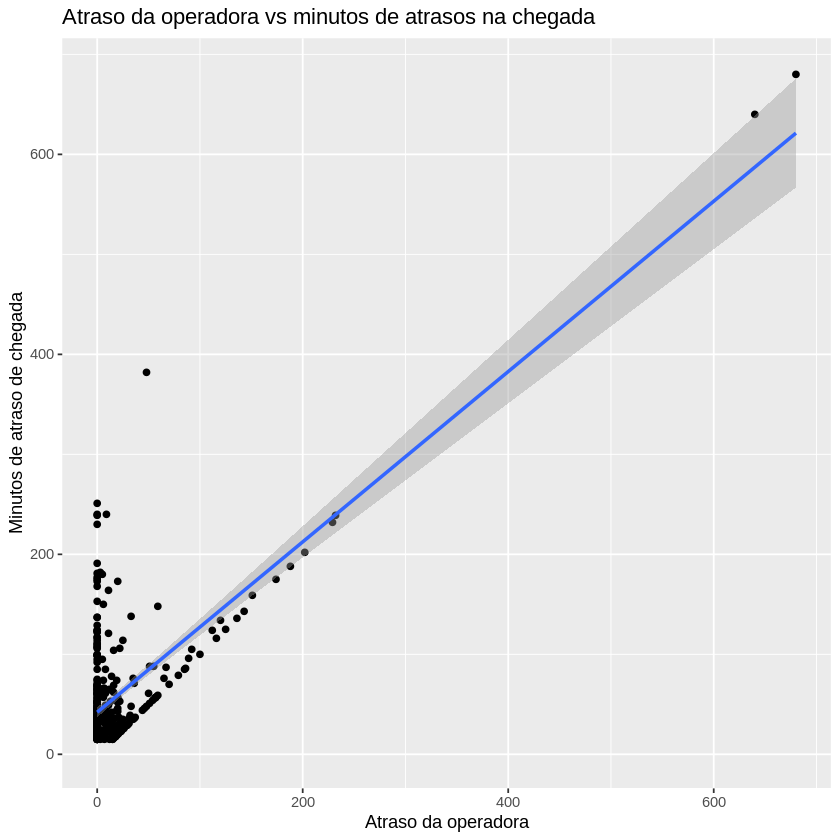

In [20]:
ggplot(data = sub_airline, mapping = aes(x = CarrierDelay, y = ArrDelayMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", na.rm = TRUE) +
  ggtitle("Atraso da operadora vs minutos de atrasos na chegada") +
  labs(x = "Atraso da operadora", y = "Minutos de atraso de chegada")

## **Análise Estatística Descritiva**

Quando você começa a analisar dados, é importante primeiro explorar seus dados antes de gastar tempo criando modelos complicados. Uma maneira fácil de fazer isso é calcular algumas estatísticas descritivas para seus dados.

A análise estatística descritiva ajuda a descrever as características básicas de um conjunto de dados e gera um breve resumo sobre a amostra e as medidas dos dados. O método **group_by()** é frequentemente usado em conjunto com **summarize()**, que resume cada grupo em um resumo de uma única linha desse grupo.

In [21]:
summary_airline_delays <- sub_airline %>%
  group_by(Reporting_Airline) %>%
  summarize(count = n(),
            mean = mean(ArrDelayMinutes, na.rm = TRUE),
            std_dev = sd(ArrDelayMinutes, na.rm = TRUE),
            min = min(ArrDelayMinutes, na.rm = TRUE),
            median = median(ArrDelayMinutes, na.rm = TRUE),
            iqr = IQR(ArrDelayMinutes, na.rm = TRUE),
            max = max(ArrDelayMinutes, na.rm = TRUE))

summary_airline_delays

Reporting_Airline,count,mean,std_dev,min,median,iqr,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA,1096,10.12226,24.95855,0,0.0,9.25,325
AS,45,12.91111,25.59903,0,0.0,16.00,124
B6,258,18.55039,47.14758,0,0.0,13.00,382
DL,526,13.83650,48.08742,0,0.0,12.00,680
HP,14,19.21429,25.31700,0,12.5,24.50,85
PA (1),33,33.54545,118.73265,0,1.0,16.00,682
TW,185,15.59459,36.82041,0,2.0,13.00,270
UA,569,11.73462,27.09474,0,0.0,11.00,191
VX,129,14.93798,31.14125,0,0.0,15.00,188


**Isso mostrará:**

*   A contagem dessa variável
*   A média
*   O desvio padrão (STD)
*   O valor mínimo
*   A mediana (percentil 50 ou quartil 2)
*   IQR (Intervalo Interquartil: quartil 3 menos quartil 1)
*   O valor máximo


Para identificar o tipo de dados de cada coluna em um dataframe, podemos usar sapply() com typeof, que localiza o tipo de algo. Então, aqui, você aplica o tipo a cada coluna em sub_airline.

In [22]:
sapply(sub_airline, typeof)

Month         DayOfWeek        FlightDate Reporting_Airline 
         "double"          "double"          "double"       "character" 
           Origin              Dest        CRSDepTime        CRSArrTime 
      "character"       "character"       "character"       "character" 
          DepTime           ArrTime          ArrDelay   ArrDelayMinutes 
      "character"       "character"          "double"          "double" 
     CarrierDelay      WeatherDelay          NASDelay     SecurityDelay 
         "double"          "double"          "double"          "double" 
LateAircraftDelay          DepDelay   DepDelayMinutes       DivDistance 
         "double"          "double"          "double"          "double" 
      DivArrDelay 
         "double"

### **Contagens de valor**

Uma maneira de resumir os dados categóricos é usando a função count(). Como exemplo, você pode obter a contagem de cada companhia aérea de relatório neste conjunto de dados.

In [23]:
sub_airline %>%
  count(Reporting_Airline)

Reporting_Airline,n
<chr>,<int>
AA,1096
AS,45
B6,258
DL,526
HP,14
PA (1),33
TW,185
UA,569
VX,129


*Vemos que temos 1096 voos de AA - American Airlines, 45 voos de AS - Alaska Airlines, 258 de B6 - jetBlue airlines, etc.*

## **Noções básicas de agrupamento**

Muitas vezes fazemos perguntas como: Existe alguma relação entre a companhia aérea que relata e os atrasos do voo? Em caso afirmativo, que dia da semana os voos têm tempos de atraso relativamente mais longos? Por exemplo, as pessoas pegam voos com mais frequência às segundas e sextas-feiras para viagens de negócios. Isso afetaria o tempo de atraso do voo? Seria bom se pudéssemos agrupar os dados por diferentes companhias aéreas que comunicam o relatório e comparar os resultados desses diferentes dias da semana uns com os outros.

No tidyverse isso pode ser feito usando o método "group_by".

Digamos que estamos interessados em encontrar os minutos médios de atraso dos voos e observar como eles diferem entre diferentes variáveis "Reporting_Airline" e "DayOfWeeks".

In [25]:
avg_delays <- sub_airline %>%
  group_by(Reporting_Airline, DayOfWeek) %>%
  summarize(mean_delays = mean(ArrDelayMinutes), .groups = "keep")

head(avg_delays)

Reporting_Airline,DayOfWeek,mean_delays
<chr>,<dbl>,<dbl>
AA,1,9.186813
AA,2,6.232558
AA,3,7.289157
AA,4,12.387500
AA,5,15.949640
AA,6,8.000000


*usei group_by() para agrupar por "Reporting_Airline" e "DayOfWeeks", em seguida, usei summarize() para calcular os minutos de atraso médios. Definir .groups = 'keep' mantém a estrutura de agrupamento, se você fosse defini-la como "drop", então a saída seria desagrupada e essencialmente seria um tibble regualr (dataframe).*

In [26]:
# classifica o dataframe em R usando múltiplas variáveis ​​com Dplyr
sorted <- avg_delays %>%
  arrange(desc(mean_delays))

head(sorted)

Reporting_Airline,DayOfWeek,mean_delays
<chr>,<dbl>,<dbl>
PA (1),6,121.83333
PA (1),5,36.50000
TW,6,34.80952
B6,7,26.82051
HP,5,26.00000
VX,2,25.65217


*Classifiquei a coluna mean_delays por ordem decrescente usando arrange(desc()) e imprimi a tabela de saída para ver as principais companhias aéreas e pares de dia da semana que têm os maiores atrasos médios de chegada.*

Para facilitar a compreensão, podemos transformar essa tabela em um mapa de calor.

Um mapa de calor tem uma variável exibida ao longo do eixo x e a outra variável exibida ao longo do eixo y. Um mapa de calor é uma técnica de visualização de dados que mostra a magnitude de um fenômeno como cor em duas dimensões.

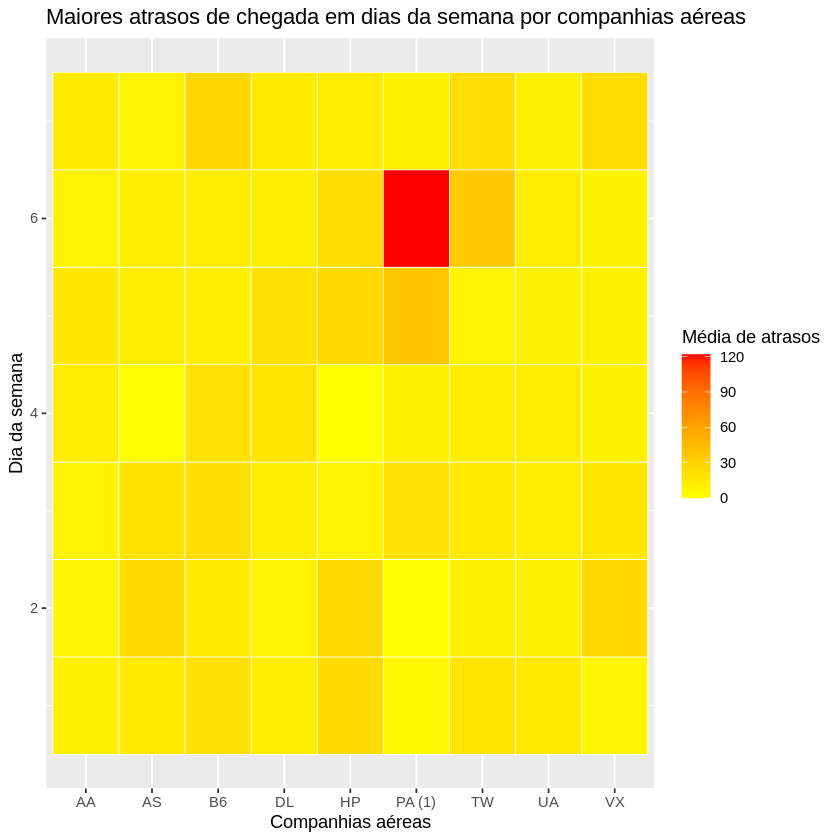

In [30]:
# A cor ainda é difícil de ver e identificar, vamos mudar a cor
avg_delays %>%
  ggplot(aes(x = Reporting_Airline,
             y = DayOfWeek,
             fill = mean_delays)) +
  ggtitle("Maiores atrasos de chegada em dias da semana por companhias aéreas") +
  labs(x = "Companhias aéreas", y = "Dia da semana", fill = "Média de atrasos") +
  # defina as bordas do bloco para serem brancas com tamanho 0,2
  geom_tile(color = "white", size = 0.2) +
  # definir escalas de cores gradientes
  scale_fill_gradient(low = "yellow", high = "red")

Para algo mais sofisticado, você sempre pode adicionar mais blocos em seu código.

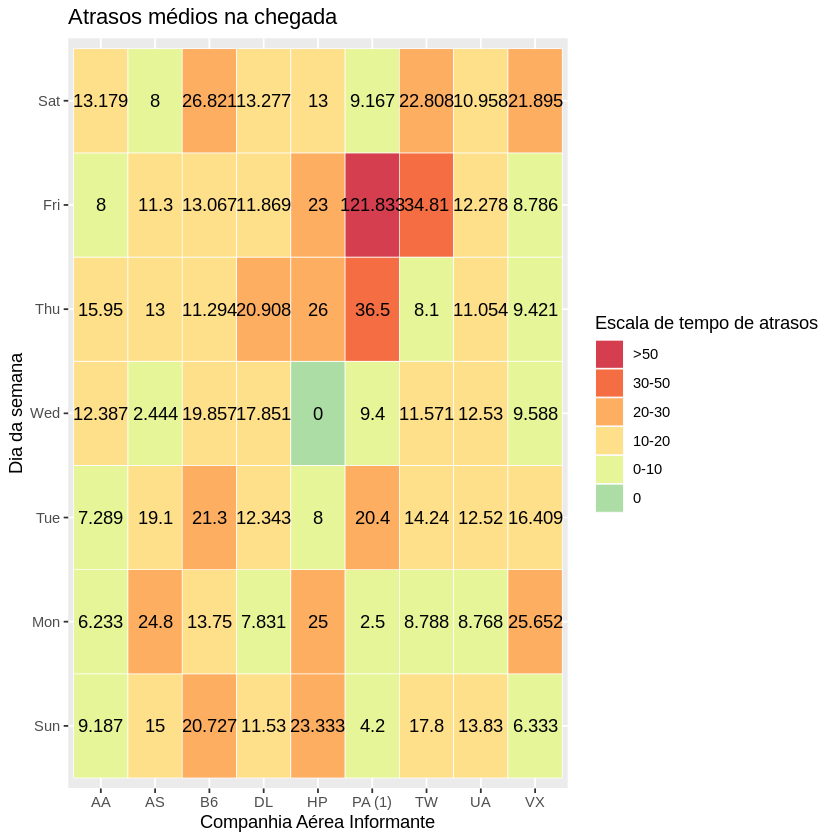

In [31]:
# Esta visualização usará o pacote lubridate
library(lubridate)

# Vamos fazer uma média simples entre Reporting_Airline e DayOfWeek
avg_delays <- sub_airline %>%
  group_by(Reporting_Airline, DayOfWeek) %>%
  summarize(mean_delays = mean(ArrDelayMinutes), .groups = 'keep') %>%

# cria uma nova variável "bins" a partir de mean_delays
# cria o primeiro intervalo -0,1 a 0,1 para incluir valores zero
  mutate(bins = cut(mean_delays, breaks = c(-0.1,0.1,10,20,30,50, max(mean_delays)),
                         labels = c("0","0-10","10-20","20-30","30-50",">50"))) %>%
  mutate(bins = factor(as.character(bins), levels = rev(levels(bins))))


ggplot(avg_delays, aes(x = Reporting_Airline, y = lubridate::wday(DayOfWeek, label = TRUE), fill = bins)) +
    geom_tile(colour = "white", size = 0.2) +
    geom_text(aes(label = round(mean_delays, 3))) +
    guides(fill = guide_legend(title = "Escala de tempo de atrasos"))+
    labs(x = "Companhia Aérea Informante", y = "Dia da semana", title = "Atrasos médios na chegada")+
    # Definir paleta de cores para a escala
    scale_fill_manual(values = c("#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#e6f598", "#abdda4"))

## **Correlação e Causalidade**

A principal pergunta que estamos tentando responder é: "O que causa atrasos de voo?". Para se ter uma melhor mensuração das características importantes, observa-se a correlação dessas variáveis com o atraso de chegada, AKA, "ArrDelayMinutes", ou seja: como os minutos de atraso de chegada dependem dessa variável?

**Primeiro, vamos começar com algumas definições importantes:**

*   Correlação: medida do grau de interdependência entre variáveis.
*   Causalidade: relação de causa e efeito entre duas variáveis.

### **Correlação de Pearson**

A Correlação de Pearson mede a dependência linear entre duas variáveis X e Y.

**O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:**

*   1: Correlação linear positiva total.
*   0: Sem correlação linear, as duas variáveis provavelmente não afetam uma à outra.
*   -1: Correlação linear negativa total.

Correlação de Pearson é o método padrão da função cor(), mas outros métodos podem ser especificados pelo método de configuração. Como antes, podemos calcular a Correlação de Pearson das variáveis "inteiras" ou "numéricas".

In [32]:
sub_airline %>%
  select(DepDelayMinutes, ArrDelayMinutes) %>%
  cor(method = "pearson")

,DepDelayMinutes,ArrDelayMinutes
DepDelayMinutes,1.0000000,0.9213328
ArrDelayMinutes,0.9213328,1.0000000


Às vezes, gostaríamos de saber o significante da estimativa de correlação.

**O valor p:**

O que é esse valor P? O valor de P é o valor de probabilidade de que a correlação entre essas duas variáveis seja estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança de que a correlação entre as variáveis é significativa.

**Por convenção, quando o**


*   p-valor é < 0,001: dizemos que há fortes evidências de que a correlação é significativa.
*   o valor de p é < 0,05: há evidência moderada de que a correlação é significativa.
*   o valor de p é < 0.1: há evidências fracas de que a correlação é significativa.
*   o valor de p é > 0.1: Não há evidências de que a correlação seja significativa.

In [33]:
# Em R, para realizar um teste de significância e obter os valores de p, você pode usar .cor.test()
sub_airline %>%
  cor.test(~DepDelayMinutes + ArrDelayMinutes, data = .)


	Pearson's product-moment correlation

data:  DepDelayMinutes and ArrDelayMinutes
t = 126.58, df = 2853, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9155942 0.9266962
sample estimates:
      cor 
0.9213328 


*Veja que o valor de P é muito pequeno, muito menor que .001. E assim podemos concluir que estamos certos sobre a forte correlação positiva.*

### **Correlações entre múltiplas variáveis**

Para calcular correlações em várias variáveis, você pode selecionar todas as variáveis e usar a função cor(), mas definir use = "pairwise.complete.obs" para que a correlação de cada par de variáveis seja calculada. Isso calcula uma matriz de coeficientes de correlação r de Pearson para todos os pares possíveis de colunas.

In [34]:
correlation <- sub_airline %>%
  select(ArrDelayMinutes, DepDelayMinutes,
         CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) %>%
  cor(use = "pairwise.complete.obs", method = "pearson")

correlation

,ArrDelayMinutes,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelayMinutes,1.00000000,0.92133281,0.72876012,0.04019104,0.26170778,0.07702208,0.41691413
DepDelayMinutes,0.92133281,1.00000000,0.75399335,0.04304843,0.07109447,0.10683841,0.44701937
CarrierDelay,0.72876012,0.75399335,1.00000000,-0.03943409,-0.18634695,-0.02396245,-0.04173491
WeatherDelay,0.04019104,0.04304843,-0.03943409,1.00000000,-0.03995573,-0.01024942,-0.02791712
NASDelay,0.26170778,0.07109447,-0.18634695,-0.03995573,1.00000000,-0.05276635,-0.15735914
SecurityDelay,0.07702208,0.10683841,-0.02396245,-0.01024942,-0.05276635,1.00000000,-0.02668880
LateAircraftDelay,0.41691413,0.44701937,-0.04173491,-0.02791712,-0.15735914,-0.02668880,1.00000000


Levando todas as variáveis em consideração, agora podemos criar um mapa de calor que visualiza a correlação entre cada uma das variáveis entre si. Este mapa de calor de correlação nos dá uma boa visão geral de como as diferentes variáveis estão relacionadas entre si e, mais importante, como essas variáveis estão relacionadas aos atrasos de chegada.

In [37]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



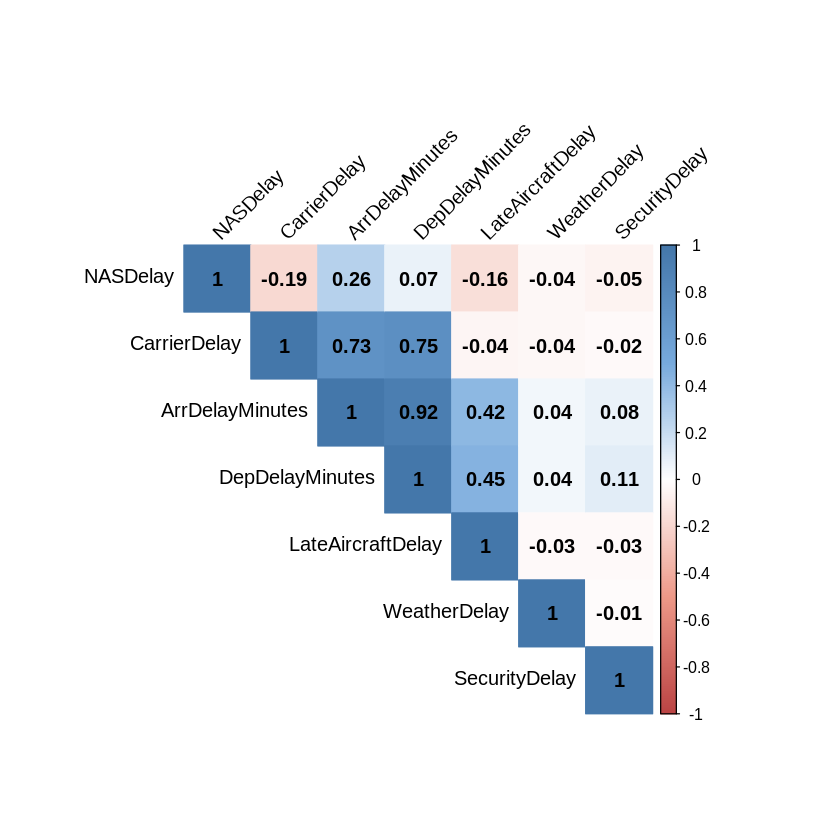

In [38]:
library(corrplot)

numerics_airline <- sub_airline %>%
  select(ArrDelayMinutes, DepDelayMinutes, CarrierDelay,
         WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay)

airlines_cor <- cor(numerics_airline, method = "pearson", use='pairwise.complete.obs')

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot(airlines_cor, method = "color", col = col(200),
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 45, #Text label color and rotation
         )

*No gráfico de correlação acima, você pode ver que dos recursos que usamos, "CarrierDelay", "DepDelayMinutes" e "LateAircraftDelay" têm as maiores correlações com "ArrDelayMinutes". A correlação entre "CarrierDelay" e "ArrDelayMinutes" é 0,73, "DepDelayMinutes" e "ArrDelayMinutes" é 0,92, e assim por diante.*

## **ANOVA (Análise de Variância)**

Digamos que queremos analisar uma variável categórica e ver a correlação entre diferentes categorias. Por exemplo, considere o conjunto de dados da companhia aérea, a pergunta que podemos fazer é: como diferentes categorias do recurso da companhia aérea que relata (como uma variável categórica) afetam os atrasos de voo?

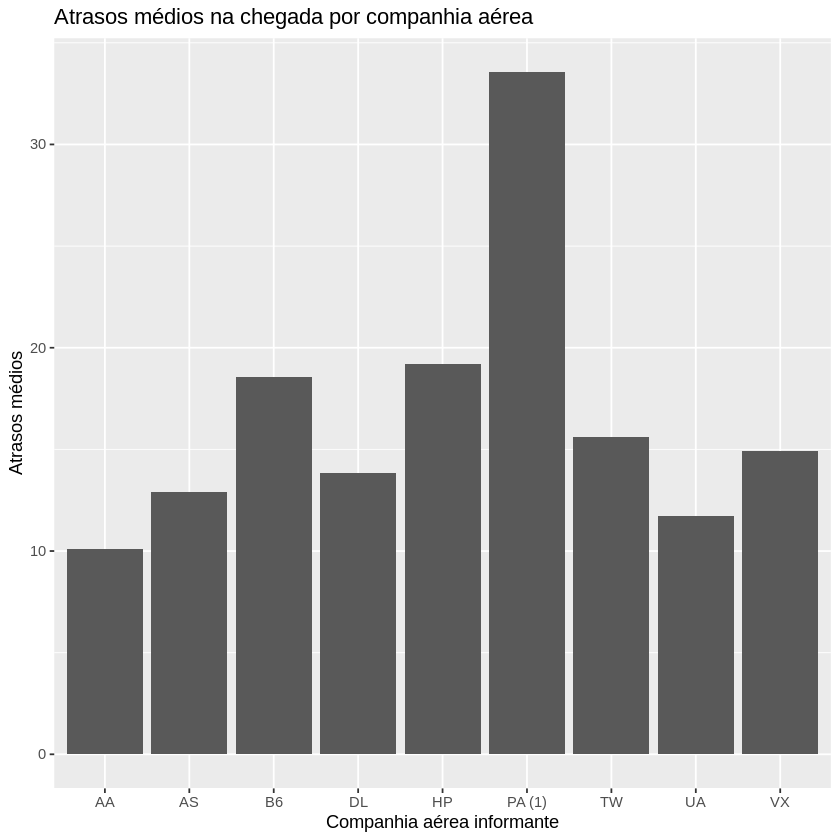

In [42]:
summary_airline_delays <- sub_airline %>%
    group_by(Reporting_Airline) %>%
    summarize(Average_Delays = mean(ArrDelayMinutes, na.rm = TRUE))

summary_airline_delays %>%
    ggplot(aes(x = Reporting_Airline, y = Average_Delays)) +
    geom_bar(stat = "identity") +
    ggtitle("Atrasos médios na chegada por companhia aérea") +
    labs(x = "Companhia aérea informante", y = "Atrasos médios")

*O gráfico de barras acima mostra os atrasos médios de voos de diferentes companhias aéreas. O código primeiro agrupa os dados por companhia aérea, depois encontra o atraso médio de chegada para cada companhia aérea, em seguida, plota isso como um gráfico de barras.*

*Em geom_bar(), você deve definir stat = "identity", já que você está passando os valores y ("Average_Delays"). Se você deixou de fora esse parâmetro, por padrão 'stat = "count", que contaria a frequência de cada companhia aérea.*

### **ANOVA: Análise de Variância**

A Análise de Variância (ANOVA) é um método estatístico utilizado para testar se há diferenças significativas entre as médias de dois ou mais grupos. ANOVA retorna dois parâmetros:

*   Pontuação no teste F: A ANOVA assume que as médias de todos os grupos são as mesmas, calcula o quanto as médias reais se desviam da suposição e a relata como a pontuação do teste F. Quanto maior a pontuação, maior a diferença entre as médias.
*   Valor de p: O valor de p informa o quão estatisticamente significativo é o valor do escore calculado.

**American Airline (AA) e Alaska Airline (AS)**

O teste ANOVA pode ser realizado no pacote de stats da base R usando a função aov(). Você pode passar os dados de atraso de chegada dos dois grupos de companhias aéreas que queremos comparar e ele calcula os resultados da ANOVA.

In [43]:
aa_as_subset <- sub_airline %>%
  select(ArrDelay, Reporting_Airline) %>%
  filter(Reporting_Airline == 'AA' | Reporting_Airline == 'AS')

ad_aov <- aov(ArrDelay ~ Reporting_Airline, data = aa_as_subset)
summary(ad_aov)

                    Df  Sum Sq Mean Sq F value Pr(>F)
Reporting_Airline    1     126   125.7    0.13  0.718
Residuals         1139 1097707   963.7               

*Neste primeiro exemplo, você pode comparar a American Airline e a Alaska Airline. Os resultados confirmam o que adivinhamos inicialmente. O atraso do voo entre "AA" e "AS" não é significativamente diferente, pois o escore F (0,13) é menor que 1 e o valor de p é maior que 0,05.*

**American Airline (AA) e Pan Am Airline (PA (1))**

Como outro exemplo, você pode comparar American Airline e Pan Am Airline. A partir da saída abaixo, o atraso de chegada entre "AA" e "PA (1)" são significativamente diferentes, uma vez que o F-score é muito grande (F = 17,95) e o p-valor é de 0,0000245, que é menor que 0,05. Em suma, podemos dizer que há uma forte correlação entre uma variável categórica e outras variáveis, se o teste ANOVA nos fornecer um grande valor de teste F e um pequeno valor de p.

In [44]:
aa_pa_subset <- sub_airline %>%
  select(ArrDelay, Reporting_Airline) %>%
  filter(Reporting_Airline == 'AA' | Reporting_Airline == 'PA (1)')

ad_aov <- aov(ArrDelay ~ Reporting_Airline, data = aa_pa_subset)
summary(ad_aov)

                    Df  Sum Sq Mean Sq F value   Pr(>F)    
Reporting_Airline    1   24008   24008   17.95 2.45e-05 ***
Residuals         1127 1507339    1337                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### **Conclusão: Variáveis Importantes**

Agora temos uma ideia melhor de como são os dados e quais variáveis são importantes levar em conta ao prever o atraso da chegada (ArrDelay). Reduzimo-lo às seguintes variáveis:

**Variáveis numéricas contínuas:**

*   DepDelayMinutes
*   CarrierDelay
*   LateAircraftDelay

**Variáveis categóricas:**

*   ReportingAirline

À medida que avança em direção a construção de modelos de aprendizado de máquina para automatizar sua análise, alimentar o modelo com variáveis que afetam significativamente a variável de destino melhorará o desempenho de previsão do modelo.